In [10]:
from numpy import *
import matplotlib.pyplot as plt
%matplotlib inline

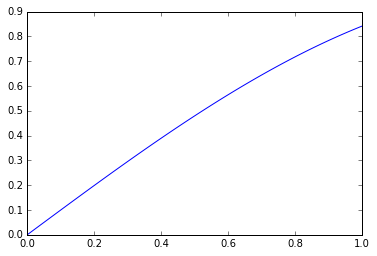

In [11]:
x = linspace(0,1,100);
u0 = sin(x);

plt.plot(x,u0);